___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

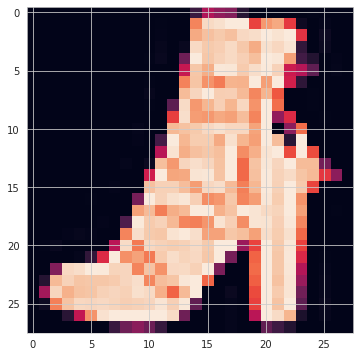

In [7]:
plt.imshow(x_train[11]);

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[11]

9

In [10]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
y_train[11]

9

In [13]:
classes[y_train[0]]

'Ankle boot'

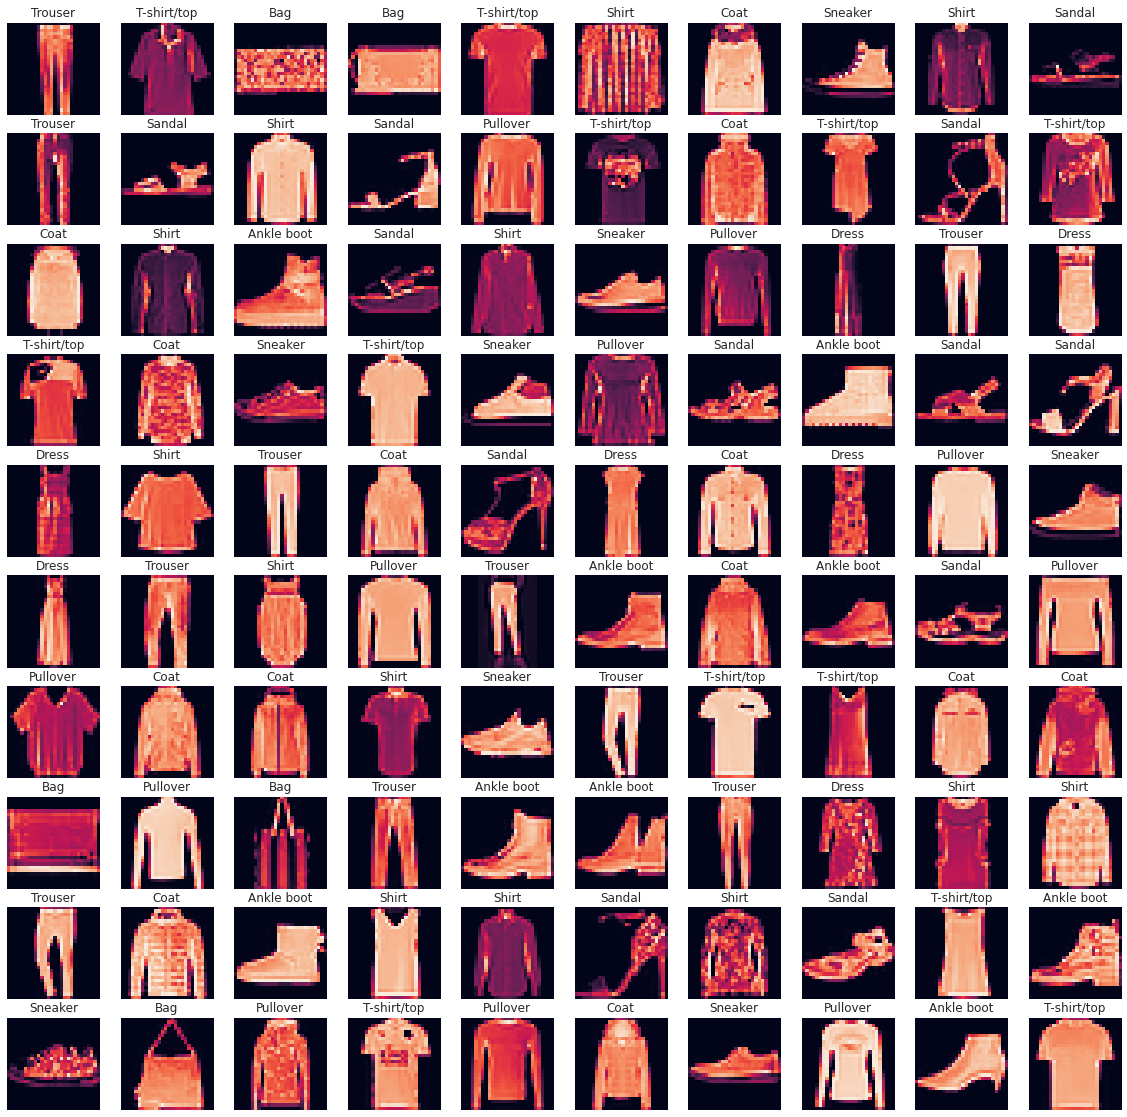

In [14]:
plt.figure(figsize=(20, 20))
for i in range(100):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
x_train[11].min()

0

In [16]:
x_train[11].max()

255

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
x_train[11].min()

0.0

In [19]:
x_train[11].max()

1.0

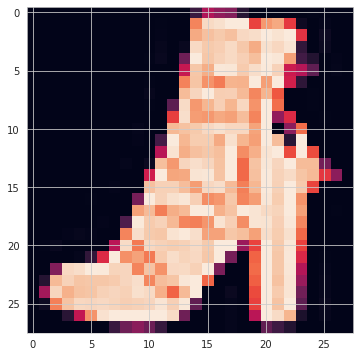

In [20]:
plt.imshow(x_train[11]);

In [21]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [23]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
Y_train[11]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
X_train = x_train
X_test = x_test

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 42)        10626     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 42)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2058)              0         
                                                                 
 dense (Dense)               (None, 128)               2

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [34]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 11s 6ms/step - loss: 0.5294 - accuracy: 0.8127 - val_loss: 0.4008 - val_accuracy: 0.8558
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3360 - accuracy: 0.8792 - val_loss: 0.3374 - val_accuracy: 0.8792
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2884 - accuracy: 0.8951 - val_loss: 0.3362 - val_accuracy: 0.8768
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2585 - accuracy: 0.9059 - val_loss: 0.2806 - val_accuracy: 0.8990
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2345 - accuracy: 0.9138 - val_loss: 0.2644 - val_accuracy: 0.9008
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2151 - accuracy: 0.9216 - val_loss: 0.2645 - val_accuracy: 0.9079
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1990 - accuracy: 0.9263 - val_loss: 0.2454 - val_accuracy: 0.914

**TASK 7: Plot values of metrics you used in your model.**

In [35]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

,loss,accuracy,val_loss,val_accuracy
17,0.067,0.975,0.307,0.918
18,0.062,0.977,0.313,0.917
19,0.055,0.980,0.349,0.917
20,0.049,0.982,0.340,0.916
21,0.045,0.984,0.370,0.917


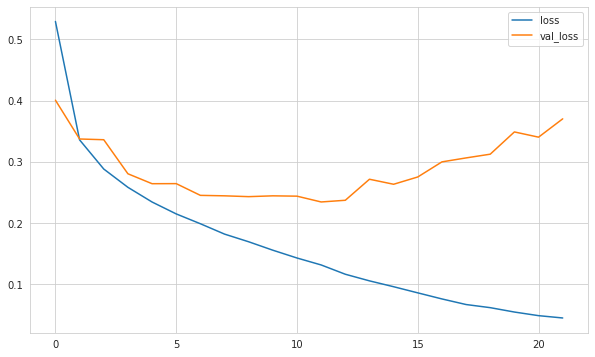

In [36]:
summary[["loss", "val_loss"]].plot();

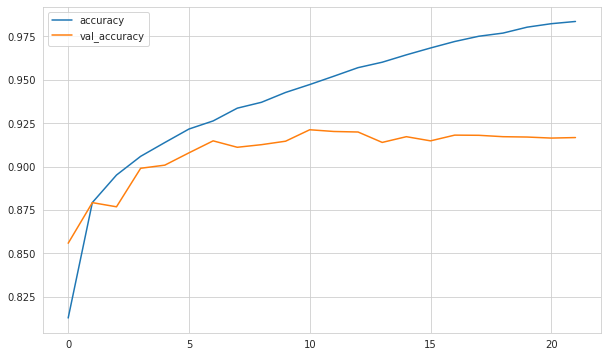

In [37]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2346 - accuracy: 0.9202


[0.23457926511764526, 0.920199990272522]

In [40]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23457926511764526
Test accuracy: 0.920199990272522


## Prediction

In [41]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[3.0218770e-09, 5.6261982e-08, 9.4444425e-07, ..., 1.7796045e-04,
        8.6373744e-09, 9.9976546e-01],
       [4.9640228e-05, 2.3787422e-11, 9.9941683e-01, ..., 4.7213866e-13,
        1.7234404e-09, 8.6850929e-11],
       [2.6066458e-09, 1.0000000e+00, 9.0698582e-10, ..., 6.3475913e-16,
        4.5918153e-10, 1.7577682e-15],
       ...,
       [1.0362414e-08, 5.2803015e-13, 6.0526153e-09, ..., 7.2358288e-09,
        9.9999022e-01, 7.8020458e-11],
       [8.5171472e-08, 9.9999952e-01, 5.8945158e-08, ..., 3.3817487e-11,
        2.7541714e-07, 1.4680564e-11],
       [1.9383207e-05, 5.5545392e-05, 8.5081853e-04, ..., 1.7644582e-02,
        4.4959111e-04, 3.3735172e-04]], dtype=float32)

In [42]:
y_pred = np.argmax(pred_prob, axis=1)

In [43]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [44]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [45]:
print(confusion_matrix(y_test, y_pred))

[[834   1  28  16   6   2 109   0   3   1]
 [  0 984   0  10   4   0   2   0   0   0]
 [ 12   1 862   6  74   0  45   0   0   0]
 [  8   3   9 929  29   0  20   0   2   0]
 [  0   0  29  16 932   0  22   0   1   0]
 [  1   0   0   0   0 985   0   7   0   7]
 [ 68   1  69  18  83   0 756   0   5   0]
 [  0   0   0   0   0   9   0 974   0  17]
 [  3   1   2   6   1   2   2   2 981   0]
 [  0   0   0   0   0   3   1  31   0 965]]


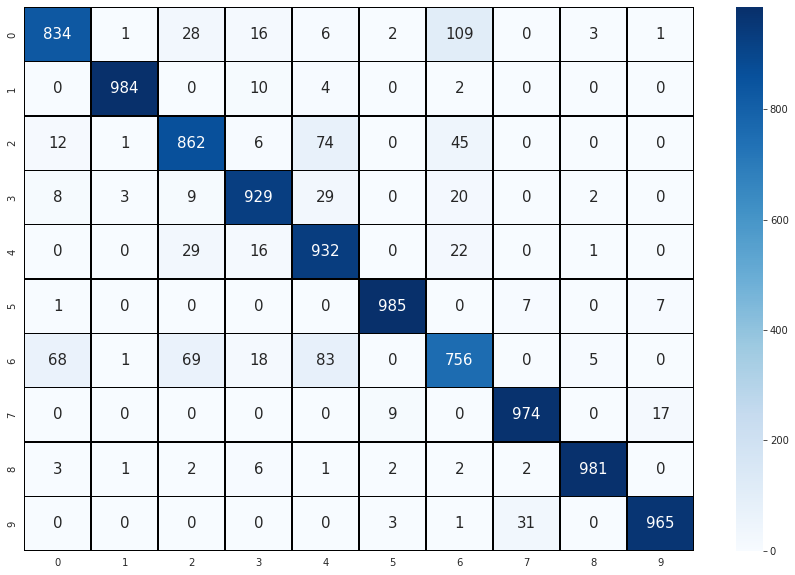

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [47]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.93      0.93      0.93      1000
           4       0.83      0.93      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.76      0.77      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Model 2

In [49]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [51]:
model.fit(X_train, Y_train, batch_size=128, epochs=12, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/12
469/469 [==============================] - 3s 6ms/step - loss: 0.6197 - accuracy: 0.7688 - val_loss: 0.4169 - val_accuracy: 0.8547
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 0.4058 - accuracy: 0.8530 - val_loss: 0.3581 - val_accuracy: 0.8737
Epoch 3/12
469/469 [==============================] - 3s 5ms/step - loss: 0.3538 - accuracy: 0.8712 - val_loss: 0.3085 - val_accuracy: 0.8871
Epoch 4/12
469/469 [==============================] - 3s 5ms/step - loss: 0.3248 - accuracy: 0.8810 - val_loss: 0.2988 - val_accuracy: 0.8899
Epoch 5/12
469/469 [==============================] - 3s 5ms/step - loss: 0.3055 - accuracy: 0.8873 - val_loss: 0.2869 - val_accuracy: 0.8993
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 0.2843 - accuracy: 0.8939 - val_loss: 0.2699 - val_accuracy: 0.9004
Epoch 7/12
469/469 [==============================] - 3s 5ms/step - loss: 0.2720 - accuracy: 0.8986 - val_loss: 0.2711 - val_accuracy: 0.9000
Epoch 

In [61]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

""


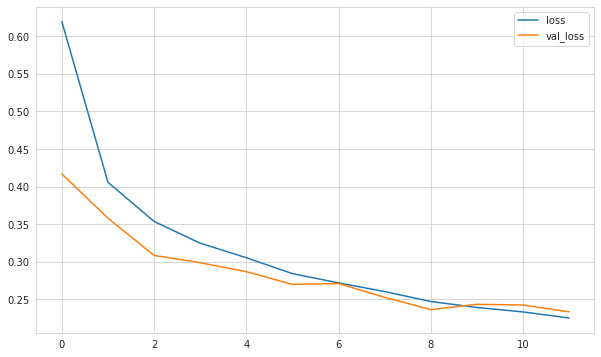

In [53]:
summary[["loss", "val_loss"]].plot();

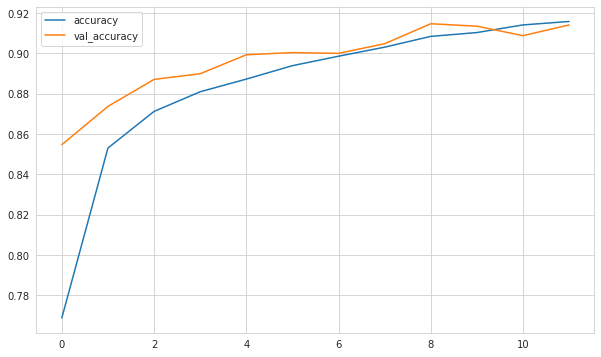

In [59]:
summary[["accuracy", "val_accuracy"]].plot();

In [54]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2334 - accuracy: 0.9141


[0.23338688910007477, 0.9140999913215637]

In [55]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23338688910007477
Test accuracy: 0.9140999913215637


In [56]:
print(confusion_matrix(y_test, y_pred))

[[834   1  28  16   6   2 109   0   3   1]
 [  0 984   0  10   4   0   2   0   0   0]
 [ 12   1 862   6  74   0  45   0   0   0]
 [  8   3   9 929  29   0  20   0   2   0]
 [  0   0  29  16 932   0  22   0   1   0]
 [  1   0   0   0   0 985   0   7   0   7]
 [ 68   1  69  18  83   0 756   0   5   0]
 [  0   0   0   0   0   9   0 974   0  17]
 [  3   1   2   6   1   2   2   2 981   0]
 [  0   0   0   0   0   3   1  31   0 965]]


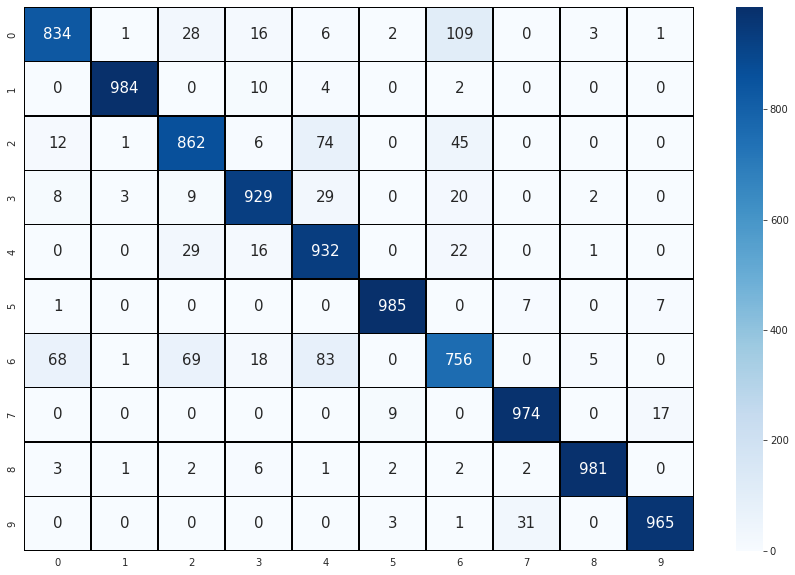

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15});

In [60]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___